In [1]:
import xarray as xr

ds_truth = xr.open_zarr("data/era5_indonesia_2018-2022.zarr")
ds_forecast = xr.open_zarr("data/ifs_lowres_indonesia_2018-2022.zarr")

print(ds_truth)
print(ds_forecast)

<xarray.Dataset> Size: 4GB
Dimensions:                   (time: 7304, latitude: 181, longitude: 201)
Coordinates:
  * latitude                  (latitude) float32 724B 30.0 29.75 ... -15.0
  * longitude                 (longitude) float32 804B 90.0 90.25 ... 140.0
  * time                      (time) datetime64[ns] 58kB 2018-01-01 ... 2022-...
Data variables:
    10m_u_component_of_wind   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    10m_v_component_of_wind   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    2m_temperature            (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    total_precipitation_24hr  (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
<xarray.Dataset> Size: 4GB
Dimensions:                   (time: 3652, prediction_timedelta: 61,
                               longitude: 41, lati

C:\Users\zharif\AppData\Local\Temp\ipykernel_6500\520338640.py:4: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds_forecast = xr.open_zarr("data/ifs_lowres_indonesia_2018-2022.zarr")


In [2]:
ds_truth

<xarray.Dataset> Size: 4GB
Dimensions:                   (time: 7304, latitude: 181, longitude: 201)
Coordinates:
  * latitude                  (latitude) float32 724B 30.0 29.75 ... -15.0
  * longitude                 (longitude) float32 804B 90.0 90.25 ... 140.0
  * time                      (time) datetime64[ns] 58kB 2018-01-01 ... 2022-...
Data variables:
    10m_u_component_of_wind   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    10m_v_component_of_wind   (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    2m_temperature            (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>
    total_precipitation_24hr  (time, latitude, longitude) float32 1GB dask.array<chunksize=(1, 181, 201), meta=np.ndarray>

In [3]:
ds_forecast

<xarray.Dataset> Size: 4GB
Dimensions:                   (time: 3652, prediction_timedelta: 61,
                               longitude: 41, latitude: 30)
Coordinates:
  * latitude                  (latitude) float64 240B -13.5 -12.0 ... 28.5 30.0
  * longitude                 (longitude) float64 328B 90.0 91.5 ... 148.5 150.0
  * prediction_timedelta      (prediction_timedelta) timedelta64[ns] 488B 00:...
  * time                      (time) datetime64[ns] 29kB 2018-01-01 ... 2022-...
Data variables:
    10m_u_component_of_wind   (time, prediction_timedelta, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 41, 30), meta=np.ndarray>
    10m_v_component_of_wind   (time, prediction_timedelta, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 41, 30), meta=np.ndarray>
    2m_temperature            (time, prediction_timedelta, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 41, 30), meta=np.ndarray>
    total_precipitation_24hr  (time, prediction_timedelta, longitude, latitude) float32 1GB dask.array<chunksize=(1, 8, 41, 30), meta=np.ndarray>

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


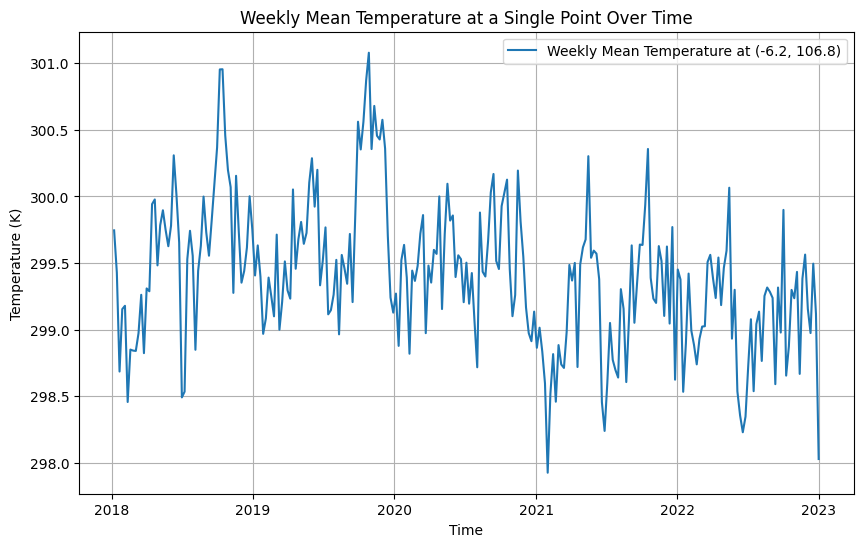

In [4]:
import matplotlib.pyplot as plt

# Select a single point (latitude, longitude) and extract temperature over time
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_truth to match ds_forecast's step times
ds_truth_resampled = ds_truth.resample(time="12H").nearest()

# Extract temperature for the selected point and all lead times
temp_point = ds_truth_resampled["2m_temperature"].sel(latitude=latitude, longitude=longitude, method="nearest")

# Resample the data to weekly means
temp_weekly_mean = temp_point.resample(time="1W").mean()

# Plot the temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label=f"Weekly Mean Temperature at ({latitude}, {longitude})")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.title("Weekly Mean Temperature at a Single Point Over Time")
plt.legend()
plt.grid()
plt.show()

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


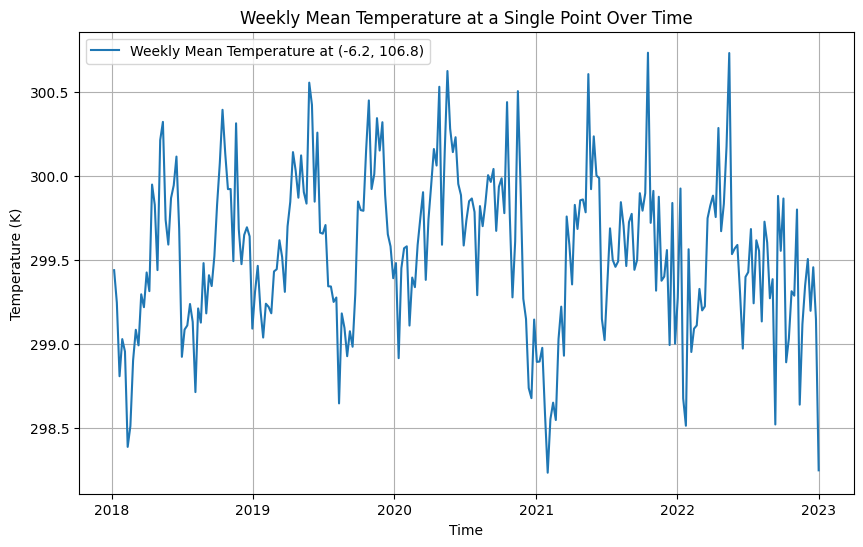

In [5]:
import matplotlib.pyplot as plt

# Select a single point (latitude, longitude) and extract temperature over time
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_truth to match ds_forecast's step times
ds_truth_resampled = ds_truth.resample(time="12H").nearest()

# Extract temperature for the selected point and all lead times
import numpy as np

temp_point = ds_forecast["2m_temperature"].sel(
	latitude=latitude,
	longitude=longitude,
	prediction_timedelta=np.timedelta64(0, 'ns'),
	method="nearest"
)

# Resample the data to weekly means
temp_weekly_mean = temp_point.resample(time="1W").mean()

# Plot the temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label=f"Weekly Mean Temperature at ({latitude}, {longitude})")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.title("Weekly Mean Temperature at a Single Point Over Time")
plt.legend()
plt.grid()
plt.show()

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


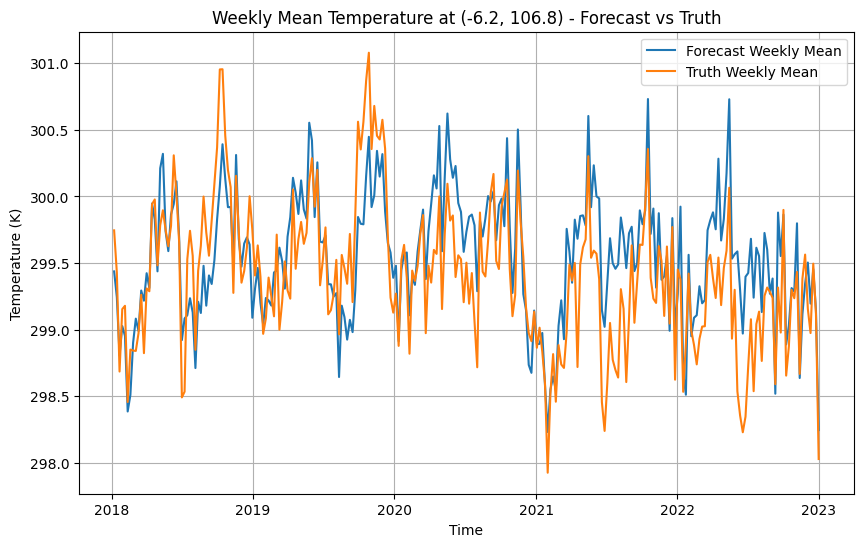

In [6]:
# Extract truth temperature at the same point
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_truth to match ds_forecast's step times
ds_truth_resampled = ds_truth.resample(time="12H").nearest()

truth_point = ds_truth_resampled["2m_temperature"].sel(latitude=latitude, longitude=longitude, method="nearest")
truth_weekly_mean = truth_point.resample(time="1W").mean()

plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label="Forecast Weekly Mean")
plt.plot(truth_weekly_mean["time"], truth_weekly_mean, label="Truth Weekly Mean")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")
plt.title(f"Weekly Mean Temperature at ({latitude}, {longitude}) - Forecast vs Truth")
plt.legend()
plt.grid()
plt.show()

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(
C:\Users\zharif\AppData\Local\Temp\ipykernel_6500\2084842688.py:116: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


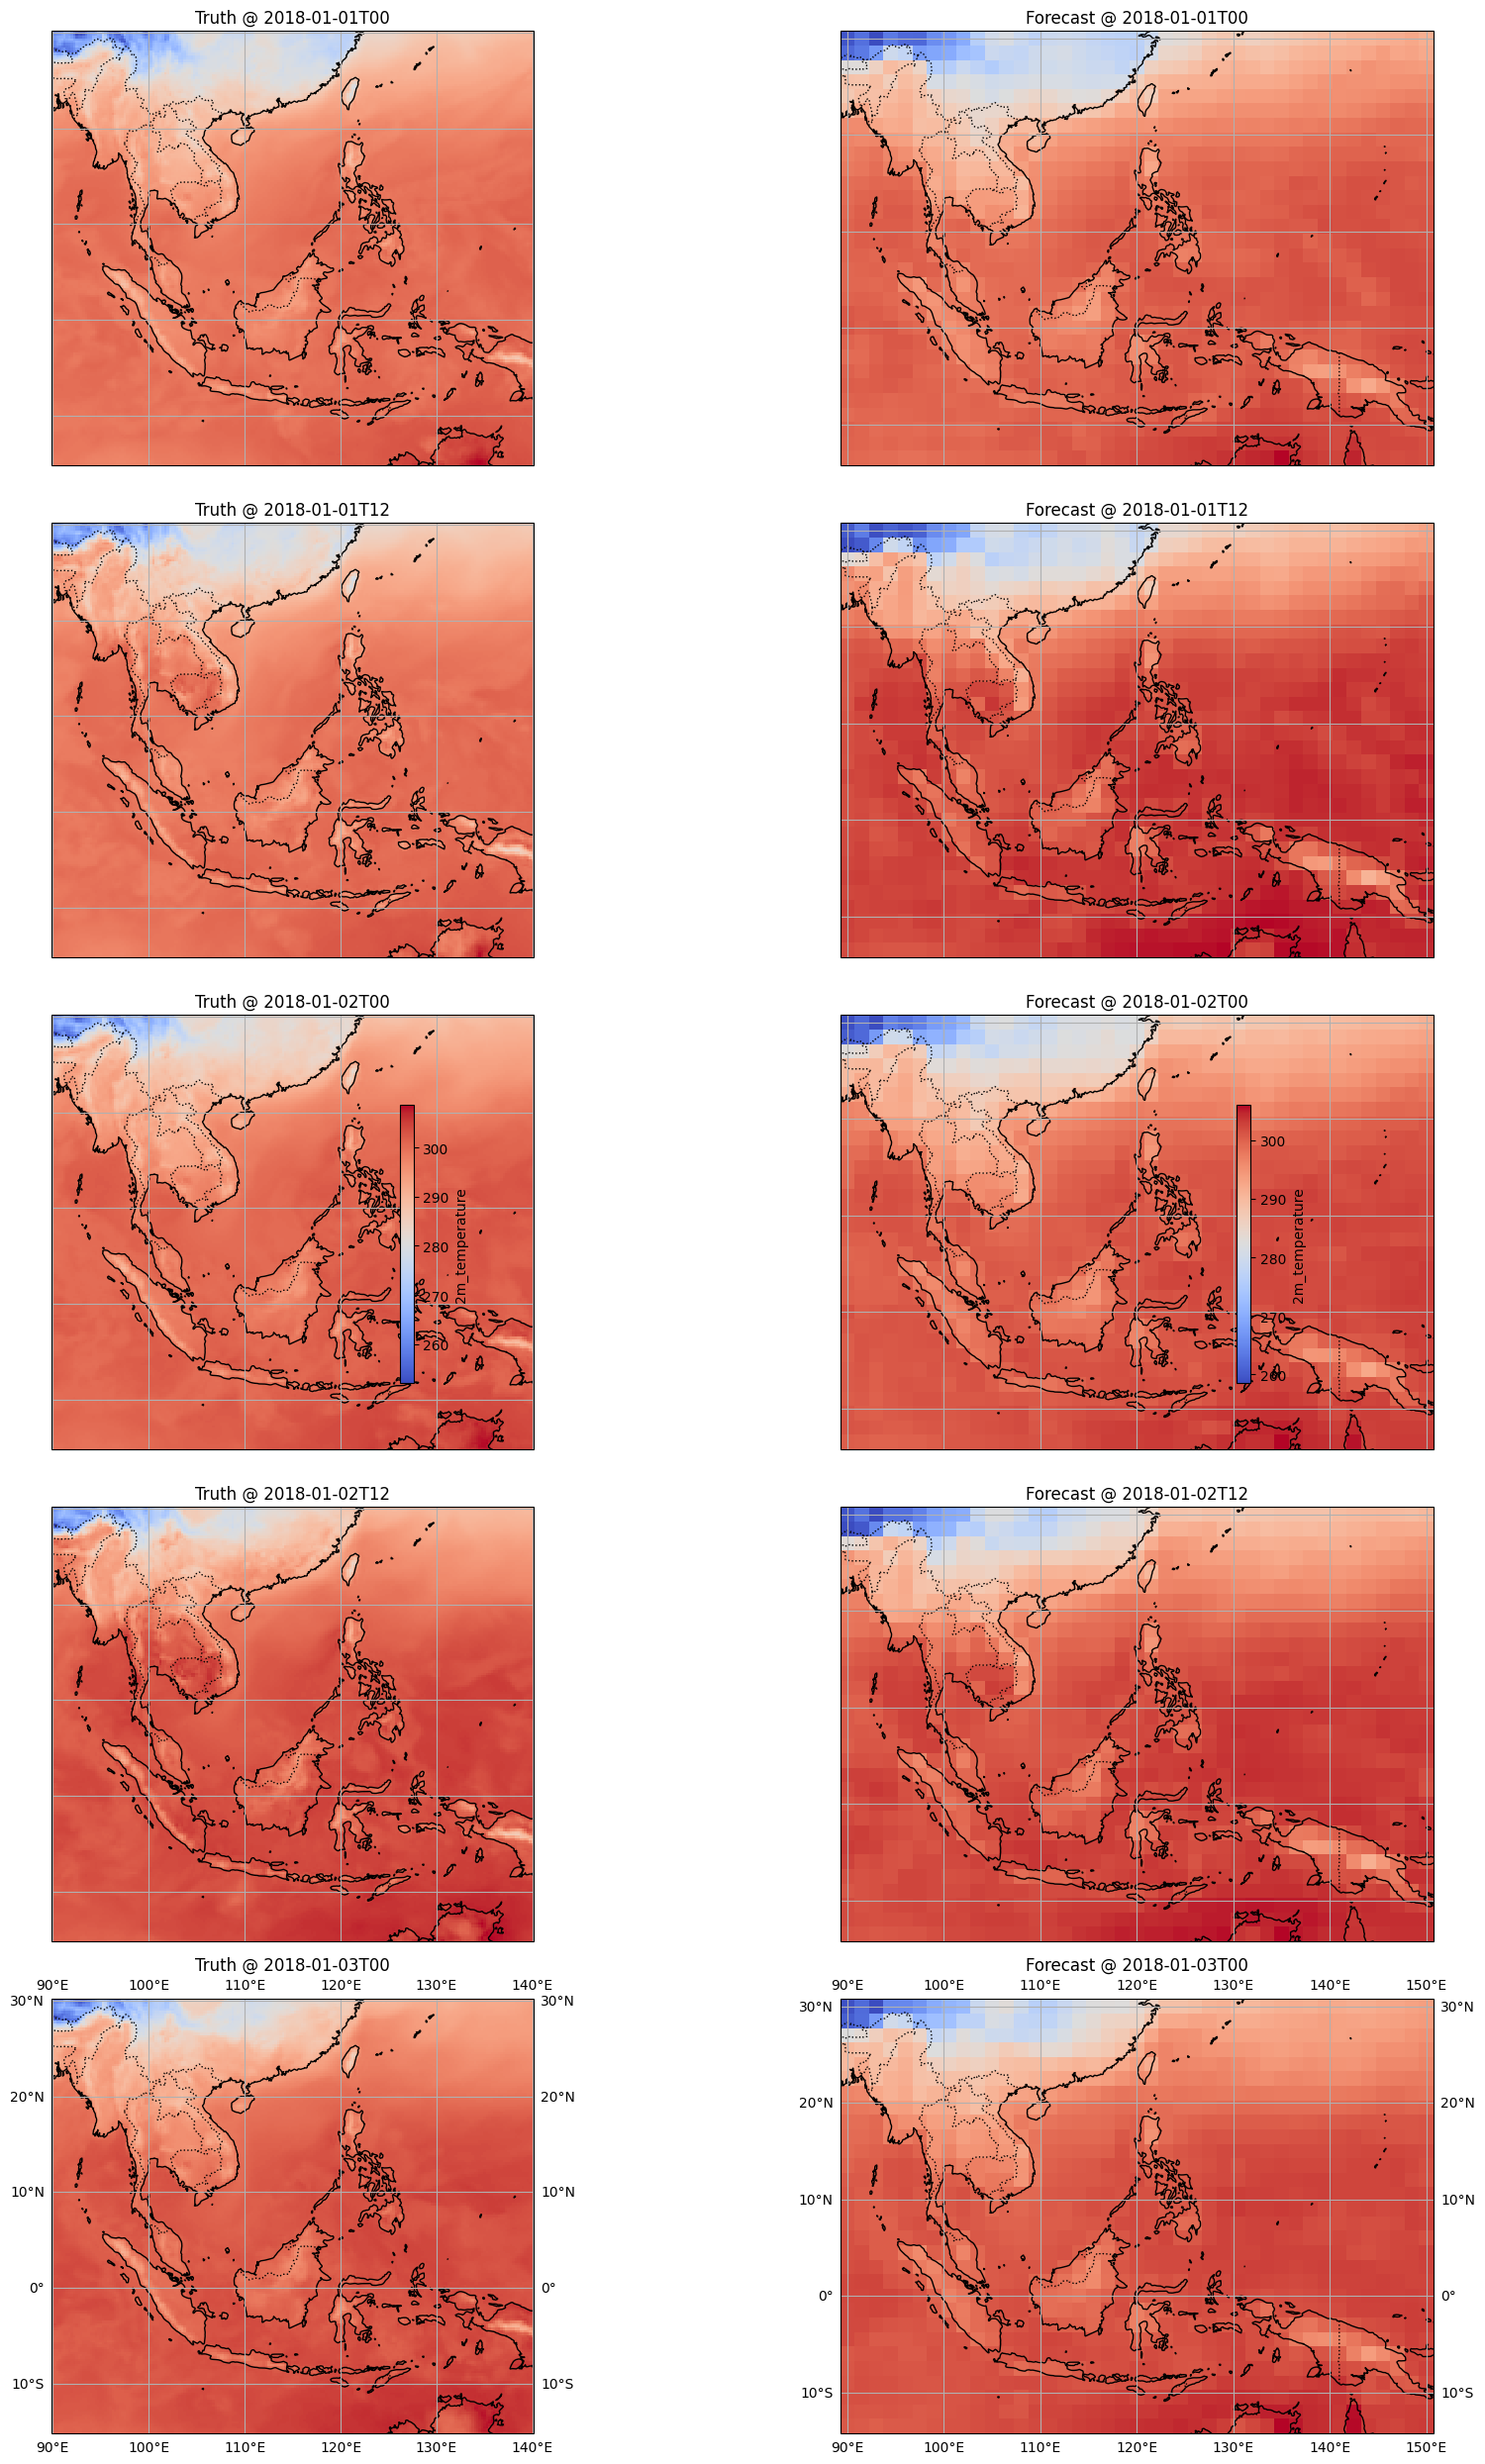

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- config ----
variable_to_plot = "2m_temperature"     # change if needed
lead_dim = "prediction_timedelta"       # change to "step" if that's your lead-time dim

# Resample truth to match forecast cadence (no interpolation across space)
ds_truth_resampled = ds_truth.resample(time="12H").nearest()

# Select sample times from forecast for alignment
sample_times = ds_forecast["time"].values[:5]

# ---------- helpers ----------
def get_latlon_names(da):
    # support lat/lon or latitude/longitude
    lat_name = "latitude" if "latitude" in da.coords else "lat"
    lon_name = "longitude" if "longitude" in da.coords else "lon"
    return lat_name, lon_name

def ensure_ascending_latlon(da):
    """Return a view with latitude & longitude ascending (required for clean edge calc)."""
    lat_name, lon_name = get_latlon_names(da)
    if np.any(np.diff(da[lat_name].values) < 0):
        da = da.sortby(lat_name)
    if np.any(np.diff(da[lon_name].values) < 0):
        da = da.sortby(lon_name)
    return da

def coord_edges_1d(c):
    """
    Build edges from 1D centers. Works for non-uniform spacing:
    edges[i] = (c[i-1] + c[i]) / 2, with end edges extrapolated by end spacings.
    """
    c = np.asarray(c)
    mid = 0.5 * (c[:-1] + c[1:])
    first_edge = c[0] - (mid[0] - c[0])
    last_edge  = c[-1] + (c[-1] - mid[-1])
    edges = np.concatenate(([first_edge], mid, [last_edge]))
    return edges

def quadmesh_from_da(da):
    """
    From a 2D DataArray with 1D lat/lon coords, return (Xe, Ye, C)
    where Xe,Ye are (Ny+1, Nx+1) edge grids and C is (Ny, Nx) data.
    """
    lat_name, lon_name = get_latlon_names(da)
    da2 = ensure_ascending_latlon(da)

    lat_c = da2[lat_name].values
    lon_c = da2[lon_name].values
    lat_e = coord_edges_1d(lat_c)
    lon_e = coord_edges_1d(lon_c)
    Xe, Ye = np.meshgrid(lon_e, lat_e)  # (Ny+1, Nx+1)

    C = da2.values  # (Ny, Nx)
    return Xe, Ye, C

# ---------- plotting ----------
fig, axs = plt.subplots(len(sample_times), 2, figsize=(20, 5*len(sample_times)),
                        subplot_kw={'projection': ccrs.PlateCarree()})
if len(sample_times) == 1:
    axs = np.array([axs])  # keep 2D indexing

im_truth_first = None
im_fcst_first = None

for i, t in enumerate(sample_times):
    # Select truth & forecast slices (no spatial interpolation)
    truth_sample = ds_truth_resampled[variable_to_plot].sel(time=t, method="nearest")

    if lead_dim in ds_forecast.dims:
        forecast_sample = ds_forecast[variable_to_plot].isel({lead_dim: 0}).sel(time=t, method="nearest")
    else:
        forecast_sample = ds_forecast[variable_to_plot].sel(time=t, method="nearest")

    # Build per-dataset edge grids
    X_truth, Y_truth, C_truth = quadmesh_from_da(truth_sample)
    X_fcst,  Y_fcst,  C_fcst  = quadmesh_from_da(forecast_sample)

    # ---- Truth panel ----
    axs[i, 0].set_title(f"Truth @ {np.datetime_as_string(t, unit='h')}")
    im0 = axs[i, 0].pcolormesh(
        X_truth, Y_truth, C_truth,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm", shading="flat"   # 'flat' because we provided edges explicitly
    )
    axs[i, 0].coastlines()
    axs[i, 0].add_feature(cfeature.BORDERS, linestyle=':')
    gl0 = axs[i, 0].gridlines(draw_labels=True, x_inline=False, y_inline=False)
    if i != len(sample_times) - 1:
        gl0.top_labels = gl0.right_labels = gl0.bottom_labels = gl0.left_labels = False

    # ---- Forecast panel ----
    axs[i, 1].set_title(f"Forecast @ {np.datetime_as_string(t, unit='h')}")
    im1 = axs[i, 1].pcolormesh(
        X_fcst, Y_fcst, C_fcst.T,
        transform=ccrs.PlateCarree(),
        cmap="coolwarm", shading="flat"
    )
    axs[i, 1].coastlines()
    axs[i, 1].add_feature(cfeature.BORDERS, linestyle=':')
    gl1 = axs[i, 1].gridlines(draw_labels=True, x_inline=False, y_inline=False)
    if i != len(sample_times) - 1:
        gl1.top_labels = gl1.right_labels = gl1.bottom_labels = gl1.left_labels = False

    if im_truth_first is None: im_truth_first = im0
    if im_fcst_first is None:  im_fcst_first  = im1

# Shared colorbars by column
fig.colorbar(im_truth_first, ax=axs[:, 0], orientation='vertical', fraction=0.02, pad=0.1).set_label(variable_to_plot)
fig.colorbar(im_fcst_first,  ax=axs[:, 1], orientation='vertical', fraction=0.02, pad=0.1).set_label(variable_to_plot)

plt.tight_layout()
plt.show()


C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


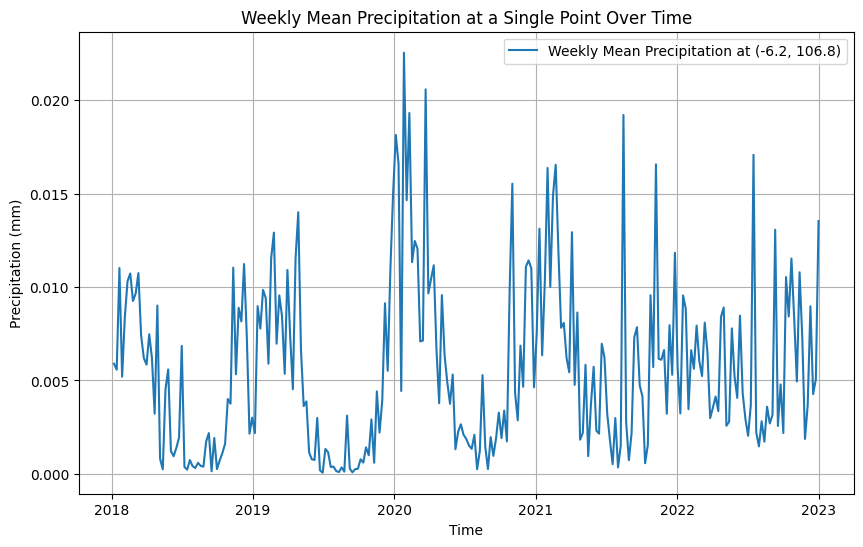

In [13]:
import matplotlib.pyplot as plt

# Select a single point (latitude, longitude) and extract temperature over time
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_truth to match ds_forecast's step times
ds_truth_resampled = ds_truth.resample(time="12H").nearest()

# Extract temperature for the selected point and all lead times
temp_point = ds_truth_resampled["total_precipitation_24hr"].sel(latitude=latitude, longitude=longitude, method="nearest")

# Resample the data to weekly means
temp_weekly_mean = temp_point.resample(time="1W").mean()

# Plot the temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label=f"Weekly Mean Precipitation at ({latitude}, {longitude})")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.title("Weekly Mean Precipitation at a Single Point Over Time")
plt.legend()
plt.grid()
plt.show()

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


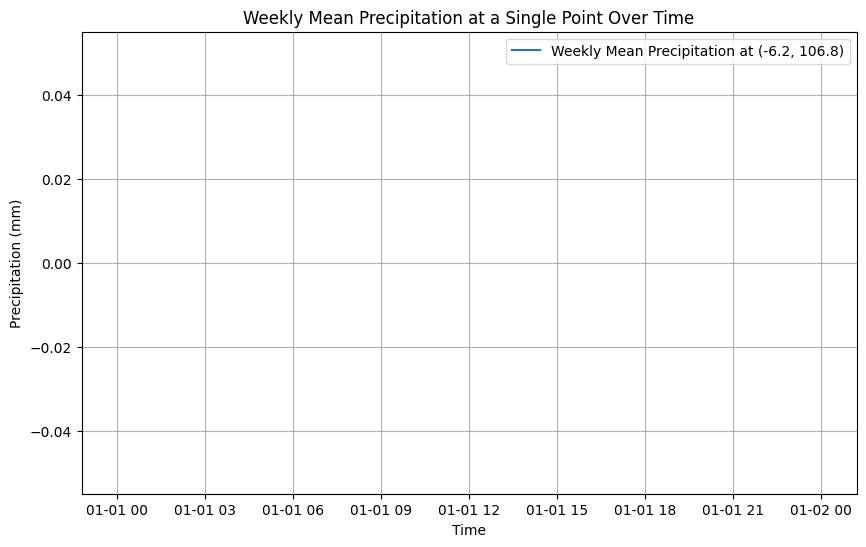

In [26]:
import matplotlib.pyplot as plt

# Select a single point (latitude, longitude) and extract temperature over time
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_forecast to match ds_forecast's step times
ds_forecast_resampled = ds_forecast.resample(time="12H").nearest()

# Extract temperature for the selected point and all lead times
temp_point = ds_forecast_resampled["total_precipitation_24hr"].sel(
    latitude=latitude, 
    longitude=longitude, 
    method="nearest", 
    prediction_timedelta=np.timedelta64(21600000000000, 'ns')
)

# Resample the data to weekly means
temp_weekly_mean = temp_point.resample(time="1W").mean()

# Plot the temperature over time
plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label=f"Weekly Mean Precipitation at ({latitude}, {longitude})")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.title("Weekly Mean Precipitation at a Single Point Over Time")
plt.legend()
plt.grid()
plt.show()

In [25]:
temp_point

<xarray.DataArray 'total_precipitation_24hr' (time: 3652,
                                              prediction_timedelta: 61)> Size: 891kB
dask.array<getitem, shape=(3652, 61), dtype=float32, chunksize=(1, 8), chunktype=numpy.ndarray>
Coordinates:
    latitude              float64 8B -6.0
    longitude             float64 8B 106.5
  * prediction_timedelta  (prediction_timedelta) timedelta64[ns] 488B 00:00:0...
  * time                  (time) datetime64[ns] 29kB 2018-01-01 ... 2022-12-3...

In [27]:
# Debug: Check available prediction_timedelta values
print("Available prediction_timedelta values:")
print(ds_forecast["prediction_timedelta"].values)
print("\nUnique prediction_timedelta values:")
print(np.unique(ds_forecast["prediction_timedelta"].values))
print(f"\nThe value you're using: {np.timedelta64(21600000000000, 'ns')}")
print(f"In hours: {np.timedelta64(21600000000000, 'ns') / np.timedelta64(1, 'h')} hours")

# Check if your specific value exists
target_delta = np.timedelta64(21600000000000, 'ns')
exists = target_delta in ds_forecast["prediction_timedelta"].values
print(f"\nDoes your target prediction_timedelta exist in the dataset? {exists}")

# Show the shape of the forecast data when selecting your prediction_timedelta
if exists:
    test_data = ds_forecast_resampled["total_precipitation_24hr"].sel(
        latitude=latitude, 
        longitude=longitude, 
        method="nearest", 
        prediction_timedelta=target_delta
    )
    print(f"\nShape of selected data: {test_data.shape}")
    print(f"Number of non-null values: {test_data.count().values}")
    print(f"Data range: {test_data.min().values} to {test_data.max().values}")
else:
    print("\nTrying with the first available prediction_timedelta:")
    first_delta = ds_forecast["prediction_timedelta"].values[0]
    print(f"First available: {first_delta}")
    test_data = ds_forecast_resampled["total_precipitation_24hr"].sel(
        latitude=latitude, 
        longitude=longitude, 
        method="nearest", 
        prediction_timedelta=first_delta
    )
    print(f"Shape of selected data: {test_data.shape}")
    print(f"Number of non-null values: {test_data.count().values}")

Available prediction_timedelta values:
[               0   21600000000000   43200000000000   64800000000000
   86400000000000  108000000000000  129600000000000  151200000000000
  172800000000000  194400000000000  216000000000000  237600000000000
  259200000000000  280800000000000  302400000000000  324000000000000
  345600000000000  367200000000000  388800000000000  410400000000000
  432000000000000  453600000000000  475200000000000  496800000000000
  518400000000000  540000000000000  561600000000000  583200000000000
  604800000000000  626400000000000  648000000000000  669600000000000
  691200000000000  712800000000000  734400000000000  756000000000000
  777600000000000  799200000000000  820800000000000  842400000000000
  864000000000000  885600000000000  907200000000000  928800000000000
  950400000000000  972000000000000  993600000000000 1015200000000000
 1036800000000000 1058400000000000 1080000000000000 1101600000000000
 1123200000000000 1144800000000000 1166400000000000 118800000000

In [28]:
# Check which prediction_timedelta values have actual data (not all NaN)
print("Checking data availability for each prediction_timedelta:")
for i, delta in enumerate(ds_forecast["prediction_timedelta"].values[:10]):  # Check first 10
    test_data = ds_forecast["total_precipitation_24hr"].sel(
        latitude=latitude, 
        longitude=longitude, 
        method="nearest", 
        prediction_timedelta=delta
    )
    non_null_count = test_data.count().values
    hours = delta / np.timedelta64(1, 'h')
    print(f"Delta {delta} ({hours:.1f} hours): {non_null_count} non-null values")
    
    if non_null_count > 0:
        print(f"  → This one has data! Range: {test_data.min().values:.4f} to {test_data.max().values:.4f}")
        break

# Let's also check the 0-hour forecast (immediate forecast)
print("\nChecking 0-hour forecast (prediction_timedelta=0):")
zero_delta = np.timedelta64(0, 'ns')
test_zero = ds_forecast["total_precipitation_24hr"].sel(
    latitude=latitude, 
    longitude=longitude, 
    method="nearest", 
    prediction_timedelta=zero_delta
)
print(f"0-hour forecast: {test_zero.count().values} non-null values")
if test_zero.count().values > 0:
    print(f"Range: {test_zero.min().values:.4f} to {test_zero.max().values:.4f}")

Checking data availability for each prediction_timedelta:
Delta 0 nanoseconds (0.0 hours): 0 non-null values
Delta 21600000000000 nanoseconds (6.0 hours): 0 non-null values
Delta 43200000000000 nanoseconds (12.0 hours): 0 non-null values
Delta 64800000000000 nanoseconds (18.0 hours): 0 non-null values
Delta 86400000000000 nanoseconds (24.0 hours): 3651 non-null values
  → This one has data! Range: 0.0000 to 0.0598

Checking 0-hour forecast (prediction_timedelta=0):
0-hour forecast: 0 non-null values


C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Selected data shape: (3652,)
Non-null values: 3651
Data range: 0.000025 to 0.059814


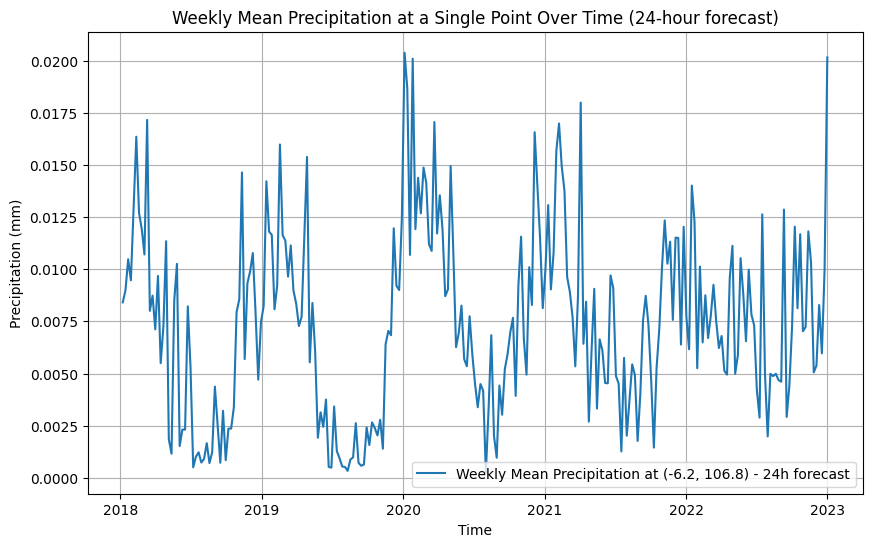

In [29]:
import matplotlib.pyplot as plt

# Select a single point (latitude, longitude) and extract precipitation over time
latitude = -6.2  # Example latitude
longitude = 106.8  # Example longitude

# Resample ds_forecast to match ds_forecast's step times
ds_forecast_resampled = ds_forecast.resample(time="12H").nearest()

# Extract precipitation for the selected point and all lead times
# Use 24-hour forecast instead of 6-hour forecast (which has no data)
temp_point = ds_forecast_resampled["total_precipitation_24hr"].sel(
    latitude=latitude, 
    longitude=longitude, 
    method="nearest", 
    prediction_timedelta=np.timedelta64(86400000000000, 'ns')  # 24 hours
)

print(f"Selected data shape: {temp_point.shape}")
print(f"Non-null values: {temp_point.count().values}")
print(f"Data range: {temp_point.min().values:.6f} to {temp_point.max().values:.6f}")

# Resample the data to weekly means
temp_weekly_mean = temp_point.resample(time="1W").mean()

# Plot the precipitation over time
plt.figure(figsize=(10, 6))
plt.plot(temp_weekly_mean["time"], temp_weekly_mean, label=f"Weekly Mean Precipitation at ({latitude}, {longitude}) - 24h forecast")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm)")
plt.title("Weekly Mean Precipitation at a Single Point Over Time (24-hour forecast)")
plt.legend()
plt.grid()
plt.show()

C:\Users\zharif\miniconda3\Lib\site-packages\xarray\groupers.py:513: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.index_grouper = pd.Grouper(


Data summary:
Truth data - Shape: (3652,), Non-null: 3652
Truth data - Shape: (3652,), Non-null: 3652
Forecast data - Shape: (3652,), Non-null: 3651
Forecast data - Shape: (3652,), Non-null: 3651
Truth range: -0.000000 to 0.082777
Truth range: -0.000000 to 0.082777
Forecast range: 0.000006 to 0.046839
Forecast range: 0.000006 to 0.046839

Time range comparison:
Truth: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000
Forecast: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000
Common period: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000

Time range comparison:
Truth: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000
Forecast: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000
Common period: 2018-01-07T00:00:00.000000000 to 2023-01-01T00:00:00.000000000


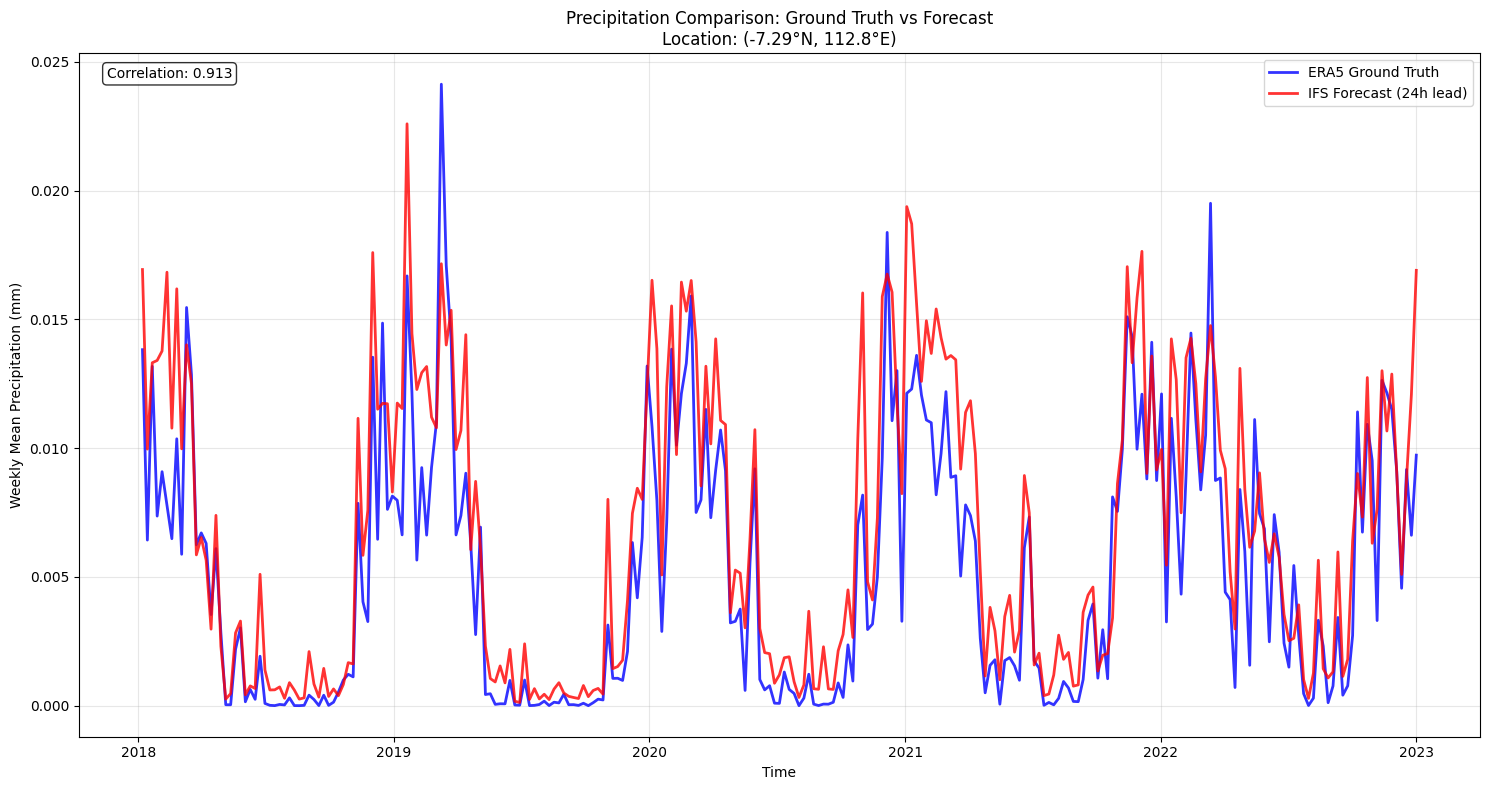


Statistics:
Correlation coefficient: 0.9131
Truth mean: 0.005209 mm
Truth mean: 0.005209 mm
Forecast mean: 0.006820 mm
Forecast mean: 0.006820 mm
Truth std: 0.004960 mm
Truth std: 0.004960 mm
Forecast std: 0.005585 mm
Forecast std: 0.005585 mm


In [33]:
import matplotlib.pyplot as plt

# Select the same point for comparison
latitude = -7.29  # Example latitude (Jakarta area)
longitude = 112.8  # Example longitude

# Extract ground truth precipitation from ERA5 (ds_truth)
ds_truth_resampled = ds_truth.resample(time="12H").nearest()
truth_precip = ds_truth_resampled["total_precipitation_24hr"].sel(
    latitude=latitude, 
    longitude=longitude, 
    method="nearest"
)

# Extract forecast precipitation (24-hour lead time)
ds_forecast_resampled = ds_forecast.resample(time="12H").nearest()
forecast_precip = ds_forecast_resampled["total_precipitation_24hr"].sel(
    latitude=latitude, 
    longitude=longitude, 
    method="nearest", 
    prediction_timedelta=np.timedelta64(86400000000000, 'ns')  # 24 hours
)

print("Data summary:")
print(f"Truth data - Shape: {truth_precip.shape}, Non-null: {truth_precip.count().values}")
print(f"Forecast data - Shape: {forecast_precip.shape}, Non-null: {forecast_precip.count().values}")
print(f"Truth range: {truth_precip.min().values:.6f} to {truth_precip.max().values:.6f}")
print(f"Forecast range: {forecast_precip.min().values:.6f} to {forecast_precip.max().values:.6f}")

# Resample both to weekly means for better visualization
truth_weekly = truth_precip.resample(time="1W").mean()
forecast_weekly = forecast_precip.resample(time="1W").mean()

# Find common time period for comparison
# Get overlapping time range
common_start = max(truth_weekly.time.min().values, forecast_weekly.time.min().values)
common_end = min(truth_weekly.time.max().values, forecast_weekly.time.max().values)

print(f"\nTime range comparison:")
print(f"Truth: {truth_weekly.time.min().values} to {truth_weekly.time.max().values}")
print(f"Forecast: {forecast_weekly.time.min().values} to {forecast_weekly.time.max().values}")
print(f"Common period: {common_start} to {common_end}")

# Filter to common time period
truth_common = truth_weekly.sel(time=slice(common_start, common_end))
forecast_common = forecast_weekly.sel(time=slice(common_start, common_end))

# Create comparison plot
plt.figure(figsize=(15, 8))

# Plot both time series
plt.plot(truth_common["time"], truth_common, 
         label=f"ERA5 Ground Truth", color='blue', linewidth=2, alpha=0.8)
plt.plot(forecast_common["time"], forecast_common, 
         label=f"IFS Forecast (24h lead)", color='red', linewidth=2, alpha=0.8)

plt.xlabel("Time")
plt.ylabel("Weekly Mean Precipitation (mm)")
plt.title(f"Precipitation Comparison: Ground Truth vs Forecast\nLocation: ({latitude}°N, {longitude}°E)")
plt.legend()
plt.grid(True, alpha=0.3)

# Add some statistics
correlation = np.corrcoef(truth_common.values[~np.isnan(truth_common.values)], 
                         forecast_common.values[~np.isnan(forecast_common.values)])[0,1]
plt.text(0.02, 0.98, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, verticalalignment='top', 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print some basic statistics
print(f"\nStatistics:")
print(f"Correlation coefficient: {correlation:.4f}")
print(f"Truth mean: {truth_common.mean().values:.6f} mm")
print(f"Forecast mean: {forecast_common.mean().values:.6f} mm")
print(f"Truth std: {truth_common.std().values:.6f} mm")
print(f"Forecast std: {forecast_common.std().values:.6f} mm")

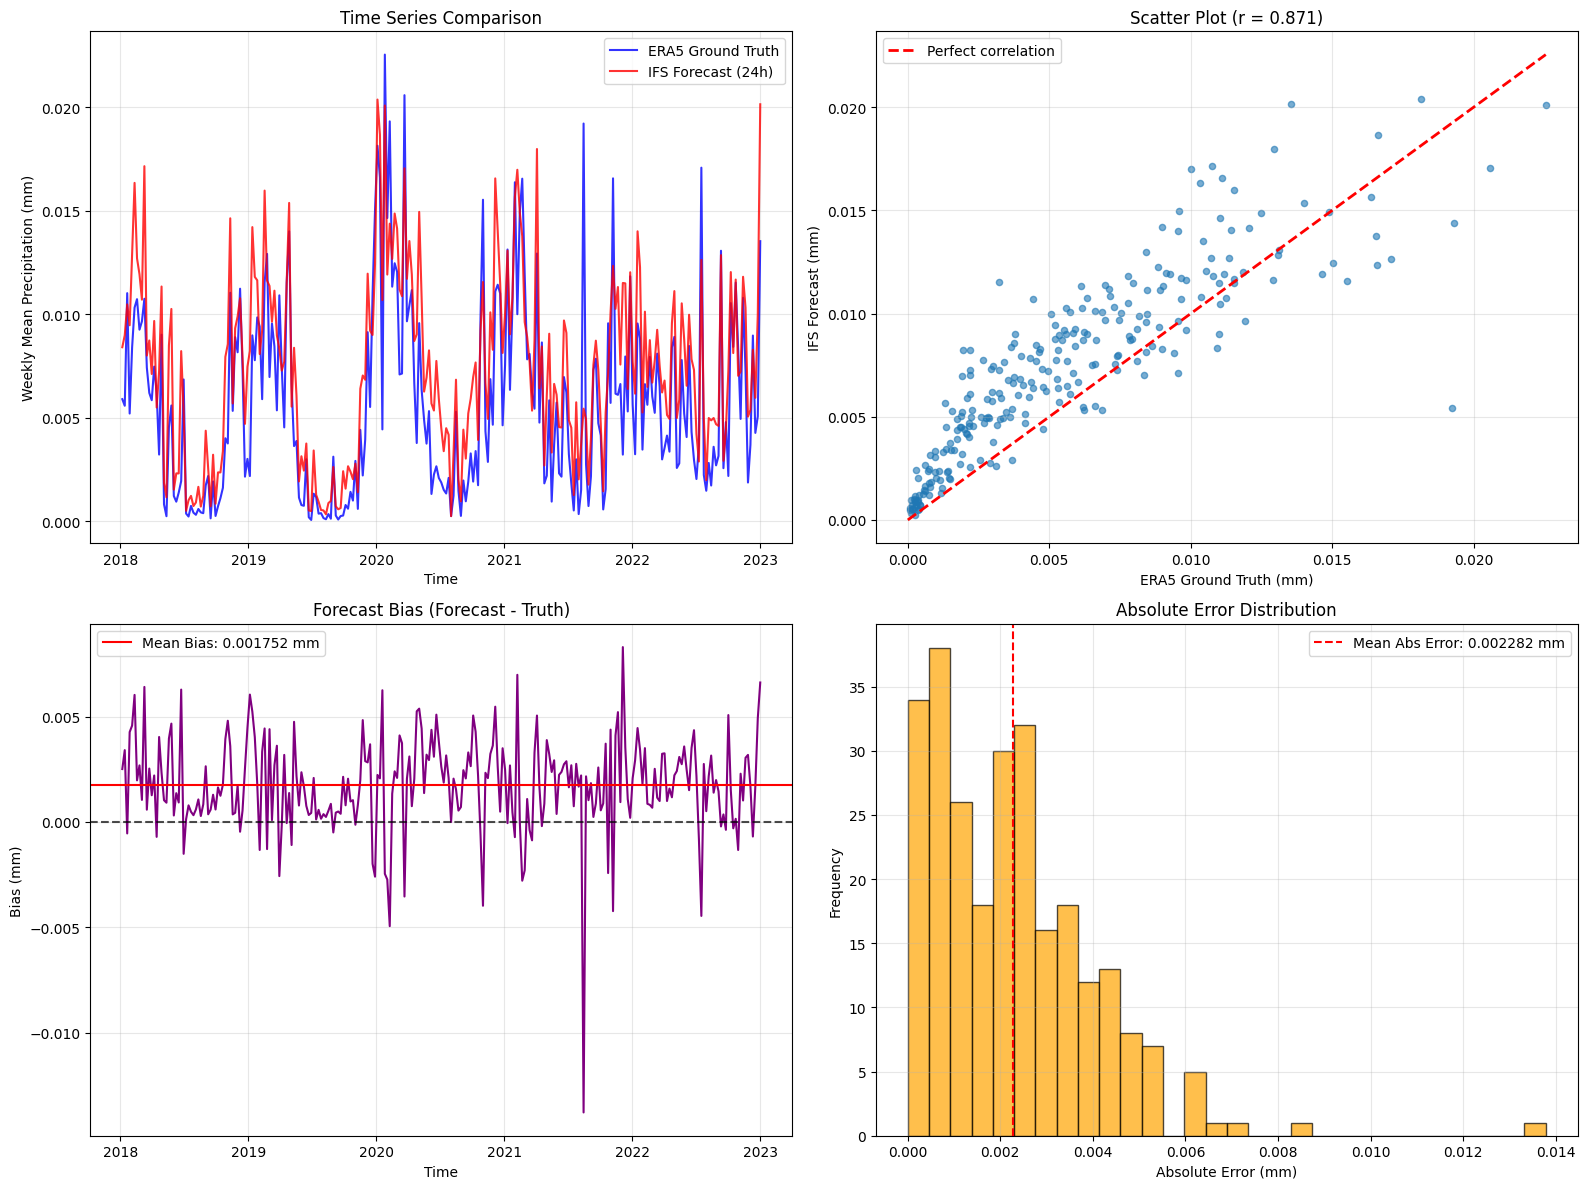


DETAILED PERFORMANCE METRICS
Correlation coefficient:     0.8705
Mean Absolute Error (MAE):   0.002282 mm
Root Mean Square Error:      0.002881 mm
Mean Bias:                   0.001752 mm
Bias Standard Deviation:     0.002287 mm

Data characteristics:
Truth - Mean: 0.005652 mm, Std: 0.004560 mm
Forecast - Mean: 0.007404 mm, Std: 0.004408 mm
Relative RMSE: 51.0%


In [32]:
# Create a more detailed comparison with scatter plot and error analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Time series overlay (zoomed to show more detail)
ax1.plot(truth_common["time"], truth_common, 
         label="ERA5 Ground Truth", color='blue', linewidth=1.5, alpha=0.8)
ax1.plot(forecast_common["time"], forecast_common, 
         label="IFS Forecast (24h)", color='red', linewidth=1.5, alpha=0.8)
ax1.set_title("Time Series Comparison")
ax1.set_xlabel("Time")
ax1.set_ylabel("Weekly Mean Precipitation (mm)")
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Scatter plot
# Remove NaN values for scatter plot
truth_clean = truth_common.values[~np.isnan(truth_common.values) & ~np.isnan(forecast_common.values)]
forecast_clean = forecast_common.values[~np.isnan(truth_common.values) & ~np.isnan(forecast_common.values)]

ax2.scatter(truth_clean, forecast_clean, alpha=0.6, s=20)
ax2.plot([0, max(truth_clean.max(), forecast_clean.max())], 
         [0, max(truth_clean.max(), forecast_clean.max())], 
         'r--', linewidth=2, label='Perfect correlation')
ax2.set_xlabel("ERA5 Ground Truth (mm)")
ax2.set_ylabel("IFS Forecast (mm)")
ax2.set_title(f"Scatter Plot (r = {correlation:.3f})")
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Bias analysis (Forecast - Truth)
bias = forecast_common - truth_common
ax3.plot(truth_common["time"], bias, color='purple', linewidth=1.5)
ax3.axhline(y=0, color='black', linestyle='--', alpha=0.7)
ax3.axhline(y=bias.mean(), color='red', linestyle='-', 
            label=f'Mean Bias: {bias.mean().values:.6f} mm')
ax3.set_title("Forecast Bias (Forecast - Truth)")
ax3.set_xlabel("Time")
ax3.set_ylabel("Bias (mm)")
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Error statistics histogram
errors = np.abs(forecast_common - truth_common)
ax4.hist(errors, bins=30, alpha=0.7, color='orange', edgecolor='black')
ax4.axvline(errors.mean(), color='red', linestyle='--', 
            label=f'Mean Abs Error: {errors.mean().values:.6f} mm')
ax4.set_title("Absolute Error Distribution")
ax4.set_xlabel("Absolute Error (mm)")
ax4.set_ylabel("Frequency")
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate detailed performance metrics
mae = np.mean(np.abs(forecast_clean - truth_clean))
rmse = np.sqrt(np.mean((forecast_clean - truth_clean)**2))
bias_mean = np.mean(forecast_clean - truth_clean)
bias_std = np.std(forecast_clean - truth_clean)

print("\n" + "="*50)
print("DETAILED PERFORMANCE METRICS")
print("="*50)
print(f"Correlation coefficient:     {correlation:.4f}")
print(f"Mean Absolute Error (MAE):   {mae:.6f} mm")
print(f"Root Mean Square Error:      {rmse:.6f} mm")
print(f"Mean Bias:                   {bias_mean:.6f} mm")
print(f"Bias Standard Deviation:     {bias_std:.6f} mm")
print("\nData characteristics:")
print(f"Truth - Mean: {np.mean(truth_clean):.6f} mm, Std: {np.std(truth_clean):.6f} mm")
print(f"Forecast - Mean: {np.mean(forecast_clean):.6f} mm, Std: {np.std(forecast_clean):.6f} mm")
print(f"Relative RMSE: {rmse/np.mean(truth_clean)*100:.1f}%")
print("="*50)

In [30]:
def find_valid_prediction_timedeltas(ds, variable, lat, lon, max_check=10):
    """
    Find prediction_timedelta values that have actual data (not all NaN)
    
    Parameters:
    ds: xarray Dataset
    variable: str, variable name to check
    lat, lon: float, coordinates to check
    max_check: int, maximum number of timedeltas to check
    
    Returns:
    list of tuples: (timedelta_value, hours, non_null_count)
    """
    valid_deltas = []
    
    for i, delta in enumerate(ds["prediction_timedelta"].values[:max_check]):
        test_data = ds[variable].sel(
            latitude=lat, 
            longitude=lon, 
            method="nearest", 
            prediction_timedelta=delta
        )
        non_null_count = test_data.count().values
        hours = delta / np.timedelta64(1, 'h')
        
        if non_null_count > 0:
            valid_deltas.append((delta, hours, non_null_count))
    
    return valid_deltas

# Find valid prediction timedeltas for precipitation
valid_deltas = find_valid_prediction_timedeltas(
    ds_forecast, "total_precipitation_24hr", latitude, longitude, max_check=20
)

print("Valid prediction_timedelta values (with data):")
for delta, hours, count in valid_deltas:
    print(f"  {hours:4.0f} hours: {count:4d} non-null values")

# Convert hours to more readable format
print("\nValid forecast lead times available:")
for delta, hours, count in valid_deltas[:5]:  # Show first 5
    if hours < 24:
        print(f"  {hours:2.0f} hours")
    else:
        days = hours / 24
        print(f"  {days:2.0f} days ({hours:3.0f} hours)")

Valid prediction_timedelta values (with data):
    24 hours: 3651 non-null values
    30 hours: 3651 non-null values
    36 hours: 3651 non-null values
    42 hours: 3651 non-null values
    48 hours: 3651 non-null values
    54 hours: 3651 non-null values
    60 hours: 3651 non-null values
    66 hours: 3651 non-null values
    72 hours: 3651 non-null values
    78 hours: 3651 non-null values
    84 hours: 3651 non-null values
    90 hours: 3651 non-null values
    96 hours: 3651 non-null values
   102 hours: 3651 non-null values
   108 hours: 3651 non-null values
   114 hours: 3651 non-null values

Valid forecast lead times available:
   1 days ( 24 hours)
   1 days ( 30 hours)
   2 days ( 36 hours)
   2 days ( 42 hours)
   2 days ( 48 hours)


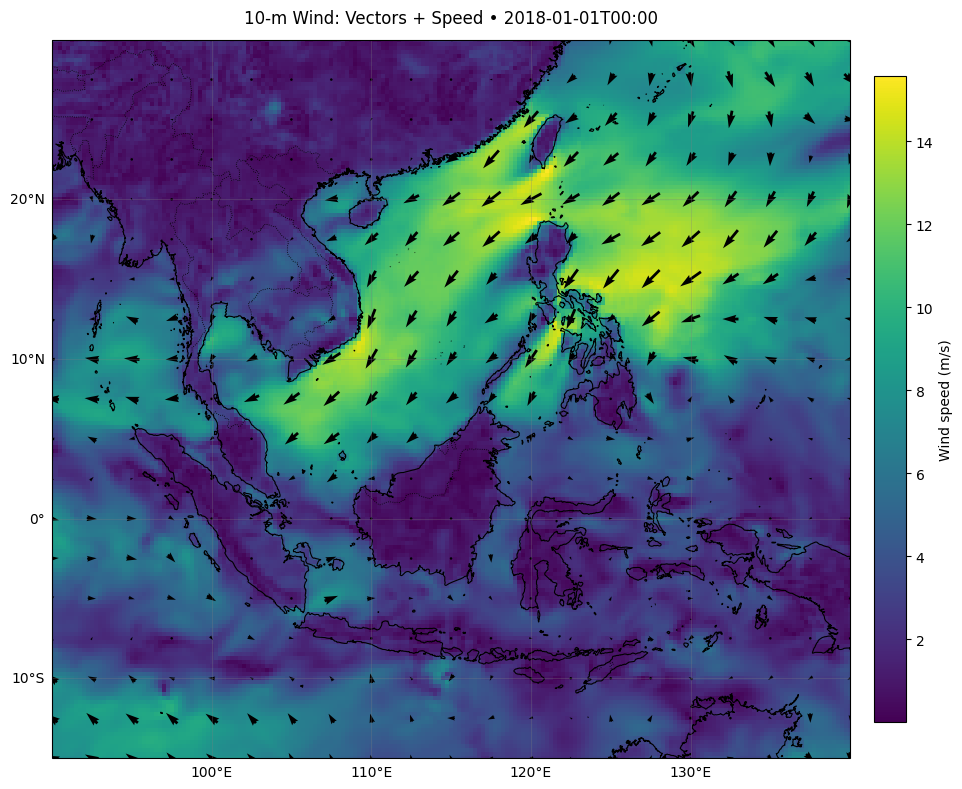

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Extract a single timestep (your first time) ---
u = ds_truth['10m_u_component_of_wind'].sel(time=ds_truth.time[0])
v = ds_truth['10m_v_component_of_wind'].sel(time=ds_truth.time[0])
lat = ds_truth['latitude']
lon = ds_truth['longitude']

# If latitude is descending (typical ERA5), sort so pcolormesh/quiver behave nicely
if (lat.values[0] > lat.values[-1]):
    u = u.sortby('latitude')
    v = v.sortby('latitude')
    lat = lat.sortby('latitude')

# --- Wind speed (use a sequential colormap, not divergent) ---
wind_speed = np.sqrt(u**2 + v**2)

# --- Subsample vectors to avoid clutter (tune the stride) ---
stride = 10
u_sub = u[::stride, ::stride]
v_sub = v[::stride, ::stride]
lat_sub = lat[::stride]
lon_sub = lon[::stride]

# --- Figure / axis ---
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})

# Domain: SE Asia (adjust to your study area)
ax.set_extent([90, 140, -15, 30], crs=proj)

# Map features
ax.add_feature(cfeature.LAND, facecolor="#f0f0f0")
ax.add_feature(cfeature.OCEAN, facecolor="#e6f2ff")
ax.coastlines(resolution="10m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.6)

# Gridlines with labels
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color="gray", alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# --- Scalar background: wind speed ---
# Use shading='auto' to silence pcolormesh warnings
im = ax.pcolormesh(
    lon, lat, wind_speed,
    transform=proj, cmap='viridis', shading='auto'
)
cb = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, shrink=0.9)
cb.set_label('Wind speed (m/s)')

# --- Vectors: quiver ---
q = ax.quiver(
    lon_sub, lat_sub, u_sub, v_sub,
    transform=proj, pivot='mid', scale=450, width=0.0035
)
# Quiver key (update the reference length to suit your data)
ax.quiverkey(q, X=0.9, Y=-0.05, U=10, label='10 m/s', labelpos='E')

# --- Optional: highlight strong winds (e.g., >= 20 m/s) ---
threshold = 20.0
strong = (wind_speed >= threshold)
# Contour only the True region; use hatch so it’s visible without hiding colors
cs = ax.contour(
    lon, lat, strong,
    levels=[0.5], colors='red', linewidths=1.2, linestyles='--', transform=proj
)
# Or, to lightly shade instead of contour, uncomment:
# ax.contourf(lon, lat, strong, levels=[0.5, 1], colors=['red'], alpha=0.25, transform=proj)

# Title with ISO time
ax.set_title(f"10-m Wind: Vectors + Speed • {np.datetime_as_string(ds_truth.time[0].values, unit='m')}", pad=12)

plt.tight_layout()
plt.show()


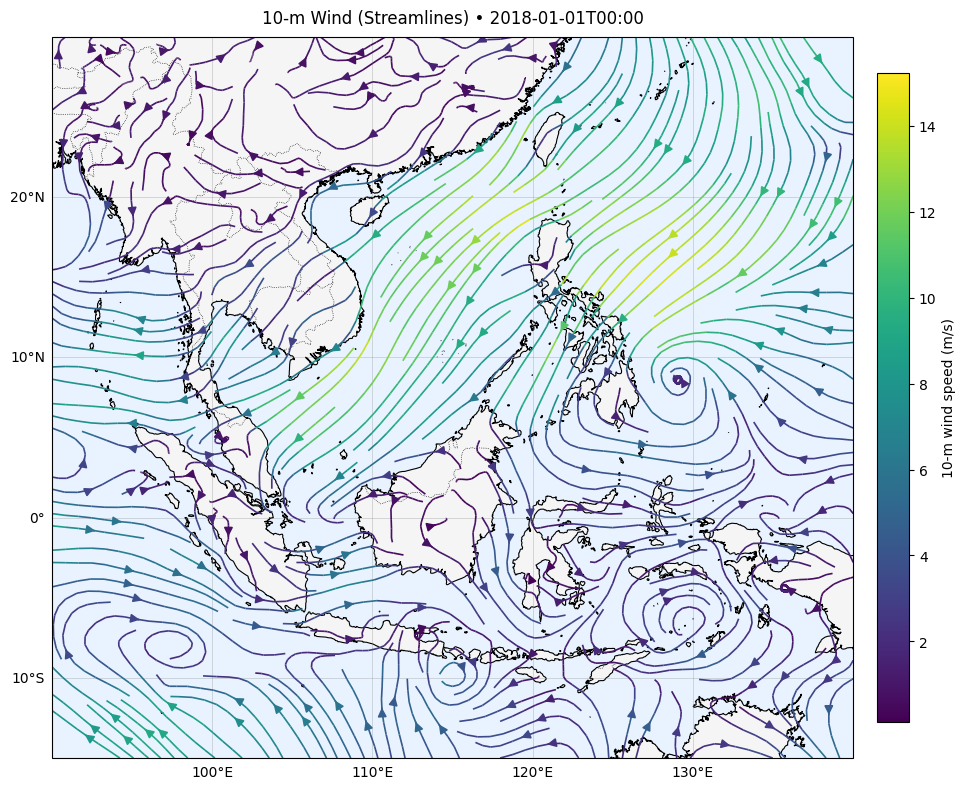

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- pick a time ---
t = ds_truth.time[0]
u = ds_truth['10m_u_component_of_wind'].sel(time=t)   # m/s
v = ds_truth['10m_v_component_of_wind'].sel(time=t)   # m/s
lat = ds_truth['latitude']
lon = ds_truth['longitude']

# Ensure latitude ascending
if lat.values[0] > lat.values[-1]:
    u = u.sortby('latitude')
    v = v.sortby('latitude')
    lat = lat.sortby('latitude')

# Optional: wrap longitudes
if (lon.max() > 180) and (lon.min() >= 0):
    lon_wrap = ((lon + 180) % 360) - 180
    u = u.assign_coords(longitude=lon_wrap).sortby('longitude')
    v = v.assign_coords(longitude=lon_wrap).sortby('longitude')
    lon = u['longitude']

# Meshgrid and wind speed
lon2d, lat2d = np.meshgrid(lon.values, lat.values)
speed = np.sqrt(u.values**2 + v.values**2)

# --- plotting ---
proj = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': proj})
ax.set_extent([90, 140, -15, 30], crs=proj)

# Basemap
ax.add_feature(cfeature.LAND, facecolor="#f5f5f5")
ax.add_feature(cfeature.OCEAN, facecolor="#e8f3ff")
ax.coastlines("10m", linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linewidth=0.5, linestyle=':')
gl = ax.gridlines(draw_labels=True, linewidth=0.4, color='gray', alpha=0.5)
gl.top_labels = False; gl.right_labels = False

# --- streamplot with colored lines ---
strm = ax.streamplot(
    lon2d, lat2d,
    u.values, v.values,
    density=2.0,
    color=speed,               # color by wind speed
    cmap='viridis',
    linewidth=1.2,
    arrowsize=1.3,
    transform=proj
)

# colorbar from streamline LineCollection
cb = fig.colorbar(strm.lines, ax=ax, orientation='vertical', pad=0.02, shrink=0.9)
cb.set_label("10-m wind speed (m/s)")

ax.set_title(f"10-m Wind (Streamlines) • {np.datetime_as_string(t.values, unit='m')}", pad=10)
plt.tight_layout()
plt.show()
